# 1. TFLite模型生成
## 1.1 预备工作
### 安装程序运行必备的库

In [8]:
%pip install tflite-model-maker

Note: you may need to restart the kernel to use updated packages.


### 导入相关的库

In [9]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

## 1.2 模型训练
### 获取数据 

In [10]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

228827136/228813984 [==============================] - 3s 0us/step


### 加载数据集，并将数据集分为训练数据和测试数据

In [11]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

2024-06-14 09:04:56.558888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /workspaces/mobileLearning/.conda/lib/python3.8/site-packages/cv2/../../lib64:
2024-06-14 09:04:56.558944: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-14 09:04:56.558967: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-4963a3): /proc/driver/nvidia/version does not exist
2024-06-14 09:04:56.573355: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


### 训练Tensorflow模型

In [12]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


2024-06-14 09:05:10.372107: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2024-06-14 09:05:10.684513: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2024-06-14 09:05:10.759440: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2024-06-14 09:05:10.816948: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.
2024-06-14 09:05:10.902673: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 38535168 exceeds 10% of free system memory.


103/103 [==============================] - 101s 957ms/step - loss: 0.8714 - accuracy: 0.7670
Epoch 2/5
103/103 [==============================] - 102s 990ms/step - loss: 0.6527 - accuracy: 0.8996
Epoch 3/5
103/103 [==============================] - 101s 974ms/step - loss: 0.6191 - accuracy: 0.9172
Epoch 4/5
103/103 [==============================] - 100s 971ms/step - loss: 0.5985 - accuracy: 0.9266
Epoch 5/5
103/103 [==============================] - 98s 953ms/step - loss: 0.5848 - accuracy: 0.9345


### 评估模型

In [13]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 13s 865ms/step - loss: 0.6333 - accuracy: 0.9046


### 导出Tensorflow Lite模型

In [14]:
model.export(export_dir='.')

2024-06-14 09:16:00.042454: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpimb1mkl9/assets


INFO:tensorflow:Assets written to: /tmp/tmpimb1mkl9/assets
2024-06-14 09:16:04.051502: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-06-14 09:16:04.051632: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2024-06-14 09:16:04.079628: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 913 nodes (656), 923 edges (664), time = 15.723ms.
  function_optimizer: function_optimizer did nothing. time = 0.004ms.

/workspaces/mobileLearning/.conda/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2024-06-14 09:16:04.795365: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored

INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpxahgrpsb/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpxahgrpsb/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


# 2. TF石头剪刀布模型生成
## 2.1 下载石头剪刀布的训练集和测试集

In [3]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps.zip -O ./rps.zip
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps-test-set.zip -O ./rps-test-set.zip

--2024-06-16 08:07:41--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.217.91, 142.251.33.123, 142.250.217.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.217.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./rps.zip’

./rps.zip           100%[===================>] 191.38M  89.7MB/s    in 2.1s    

2024-06-16 08:07:43 (89.7 MB/s) - ‘./rps.zip’ saved [200682221/200682221]

--2024-06-16 08:07:44--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.123, 142.251.215.251, 142.251.33.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./rps-test-set.zip’

./rps-test-set.zi

## 2.2 解压数据集

In [5]:
import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

## 2.3 检测数据集的解压结果，打印相关信息

In [6]:
rock_dir = os.path.join('./rps/rock')
paper_dir = os.path.join('./rps/paper')
scissors_dir = os.path.join('./rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-009.png', 'rock05ck01-096.png', 'rock07-k03-016.png', 'rock05ck01-041.png', 'rock06ck02-093.png', 'rock05ck01-017.png', 'rock04-059.png', 'rock07-k03-112.png', 'rock02-113.png', 'rock06ck02-032.png']
['paper06-032.png', 'paper03-028.png', 'paper01-042.png', 'paper05-065.png', 'paper07-055.png', 'paper07-087.png', 'paper05-008.png', 'paper01-080.png', 'paper04-085.png', 'paper01-109.png']
['scissors01-090.png', 'scissors04-021.png', 'scissors01-050.png', 'scissors03-087.png', 'scissors01-105.png', 'scissors03-009.png', 'scissors03-101.png', 'scissors04-062.png', 'testscissors03-077.png', 'scissors03-098.png']


## 2.4 各打印两张石头剪刀布训练集图片

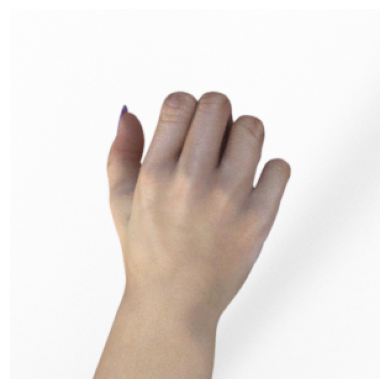

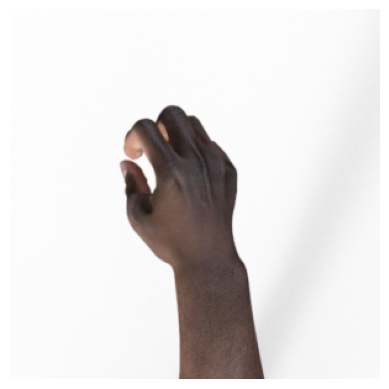

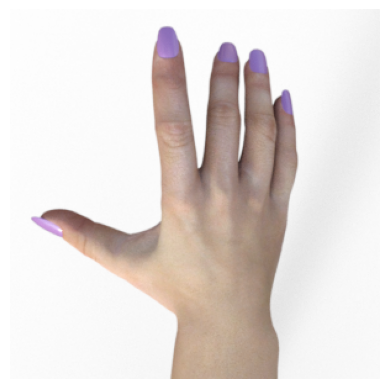

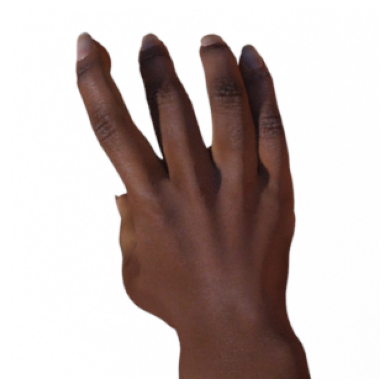

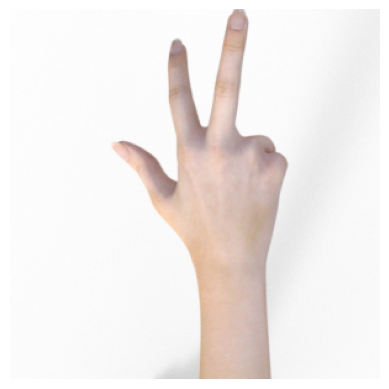

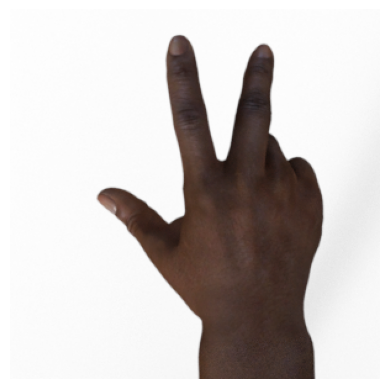

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## 2.5 调用TensorFlow的keras进行数据模型的训练和评估

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

2024-06-16 08:14:01.050773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-16 08:14:01.050812: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


2024-06-16 08:14:09.386880: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-16 08:14:09.386918: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-16 08:14:09.386943: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-4963a3): /proc/driver/nvidia/version does not exist
2024-06-16 08:14:09.388168: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2024-06-16 08:14:10.675237: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 34020000 exceeds 10% of free system memory.


Epoch 1/25


2024-06-16 08:14:12.904528: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 34020000 exceeds 10% of free system memory.
2024-06-16 08:14:12.922623: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.
2024-06-16 08:14:13.925074: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 176633856 exceeds 10% of free system memory.
2024-06-16 08:14:14.135049: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 167215104 exceeds 10% of free system memory.


20/20 [==============================] - 131s 6s/step - loss: 1.4507 - accuracy: 0.3294 - val_loss: 1.0965 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 132s 7s/step - loss: 1.0997 - accuracy: 0.3655 - val_loss: 1.1405 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 127s 6s/step - loss: 1.1389 - accuracy: 0.3992 - val_loss: 0.9243 - val_accuracy: 0.4946
Epoch 4/25
20/20 [==============================] - 123s 6s/step - loss: 0.9670 - accuracy: 0.5163 - val_loss: 0.5772 - val_accuracy: 0.7177
Epoch 5/25
20/20 [==============================] - 122s 6s/step - loss: 1.0557 - accuracy: 0.5508 - val_loss: 0.8618 - val_accuracy: 0.6532
Epoch 6/25
20/20 [==============================] - 122s 6s/step - loss: 0.8027 - accuracy: 0.6417 - val_loss: 0.6783 - val_accuracy: 0.8038
Epoch 7/25
20/20 [==============================] - 122s 6s/step - loss: 0.6657 - accuracy: 0.7194 - val_loss: 0.5235 - val_accuracy: 0.6855
Epoch 8/25
20/20 [======

## 2.6 绘制训练和验证结果的相关信息

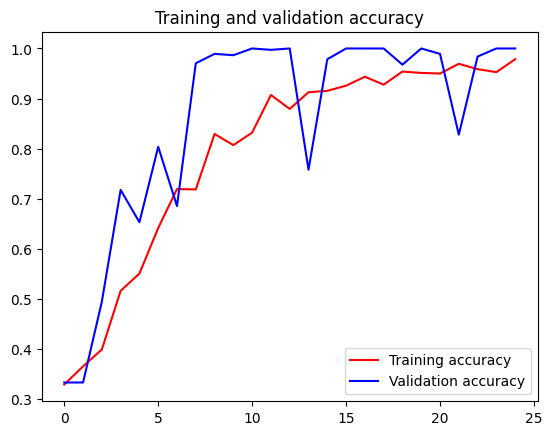

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()